In [6]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt
import statsmodels.api as sm

import numpy as np

import statsmodels.formula.api as smf

In [7]:
tips = sns.load_dataset("tips")

tips["net_bill"] = tips["total_bill"] - tips["tip"]

print(tips.head())

   total_bill   tip     sex smoker  day    time  size  net_bill
0       16.99  1.01  Female     No  Sun  Dinner     2     15.98
1       10.34  1.66    Male     No  Sun  Dinner     3      8.68
2       21.01  3.50    Male     No  Sun  Dinner     3     17.51
3       23.68  3.31    Male     No  Sun  Dinner     2     20.37
4       24.59  3.61  Female     No  Sun  Dinner     4     20.98


In [8]:
X = tips["net_bill"]
X = sm.add_constant(X) 
y = tips["tip"]

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           5.02e-23
Time:                        15:27:36   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3307      0.168      7.907      0.0

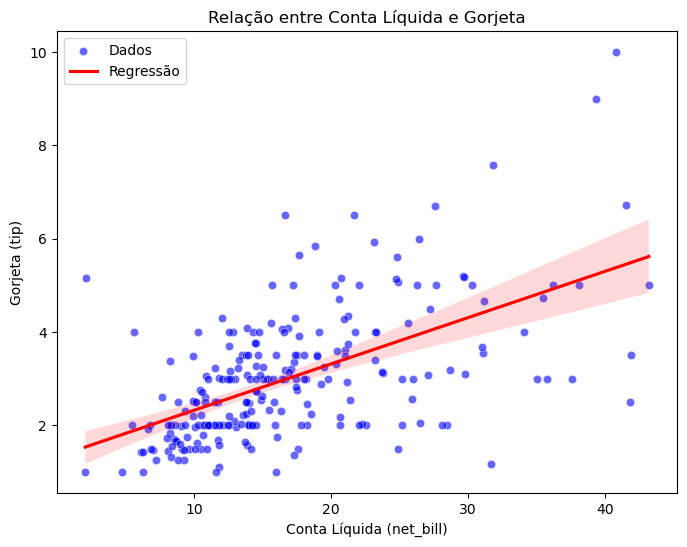

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="net_bill", y="tip", data=tips, color="blue", alpha=0.6, label="Dados")

sns.regplot(x="net_bill", y="tip", data=tips, scatter=False, color="red", label="Regressão")

# Personalizar o gráfico
plt.xlabel("Conta Líquida (net_bill)")
plt.ylabel("Gorjeta (tip)")
plt.title("Relação entre Conta Líquida e Gorjeta")
plt.legend()
plt.show()


In [12]:
# Criar a variável tip_pct (porcentagem da gorjeta)
tips["tip_pct"] = tips["tip"] / tips["total_bill"]

In [13]:
X = tips["net_bill"]
X = sm.add_constant(X)
y = tips["tip_pct"]

modelo_pct = sm.OLS(y, X).fit()

print(modelo_pct.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.21e-12
Time:                        15:34:37   Log-Likelihood:                 361.93
No. Observations:                 244   AIC:                            -719.9
Df Residuals:                     242   BIC:                            -712.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2162      0.008     26.401      0.0

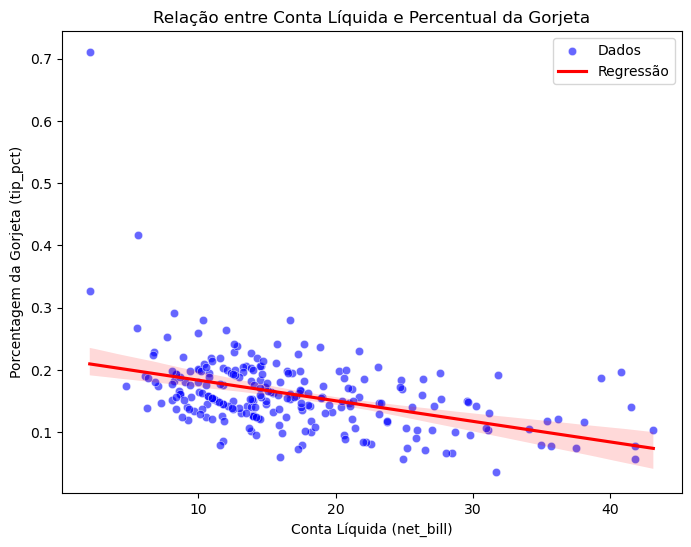

In [15]:
plt.figure(figsize=(8,6))

sns.scatterplot(x="net_bill", y="tip_pct", data=tips, color="blue", alpha=0.6, label="Dados")

sns.regplot(x="net_bill", y="tip_pct", data=tips, scatter=False, color="red", label="Regressão")

plt.xlabel("Conta Líquida (net_bill)")
plt.ylabel("Porcentagem da Gorjeta (tip_pct)")
plt.title("Relação entre Conta Líquida e Percentual da Gorjeta")
plt.legend()
plt.show()

O primeiro gráfico mostra a gorjeta absoluta (tip) como variável dependente, resultando em um ajuste positivo e linear, indicando que gorjetas maiores são dadas em contas mais altas.
O segundo gráfico analisa o percentual da gorjeta (tip_pct) em relação à conta líquida. O ajuste mostra uma leve tendência negativa, sugerindo que, proporcionalmente, gorjetas menores são dadas em contas maiores.
Não podemos compará-los os $R^2$s? diretamente, pois as variáveis dependentes são diferentes.

In [20]:
tips["net_bill"] = tips["total_bill"] - tips["tip"]

# Criar a variável percentual de gorjeta
tips["tip_pct"] = tips["tip"] / tips["net_bill"]

# Ajustar a regressão de tip_pct por net_bill
X = sm.add_constant(tips["net_bill"])  # Adiciona o intercepto
y = tips["tip_pct"]
reg_pct = sm.OLS(y, X).fit()

# Obter os valores preditos para tip_pct
tips["pred_tip_pct"] = reg_pct.fittedvalues

# Obter os valores preditos para tip
tips["pred_tip"] = tips["pred_tip_pct"] * tips["net_bill"]

# Calcular o R² para tip
SSR = np.sum((tips["pred_tip"] - tips["tip"].mean()) ** 2)
SST = np.sum((tips["tip"] - tips["tip"].mean()) ** 2)
r2_tip = SSR / SST

# Comparar com o R² da regressão tip ~ net_bill
y_tip = tips["tip"]
reg_tip = sm.OLS(y_tip, X).fit()
r2_original = reg_tip.rsquared

print(f"R² do modelo original (tip ~ net_bill): {r2_original:.4f}")
print(f"R² do modelo ajustado (pred_tip ~ tip): {r2_tip:.4f}")

R² do modelo original (tip ~ net_bill): 0.3325
R² do modelo ajustado (pred_tip ~ tip): 0.2103
